In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('activity_log.csv')

In [3]:
def clean_numeric(column):
    df[column] = pd.to_numeric(df[column], errors='coerce')

numeric_columns = ['Distance', 'Calories', 'Avg HR', 'Max HR', 'Avg Run Cadence', 'Max Run Cadence', 
                   'Elev Gain', 'Elev Loss', 'Avg Stride Length', 'Best Lap Time', 'Number of Laps']

for column in numeric_columns:
    clean_numeric(column)

def pace_to_seconds(pace):
    try:
        minutes, seconds = map(int, pace.split(':'))
        return minutes * 60 + seconds
    except:
        return np.nan

df['Avg Pace (sec)'] = df['Avg Pace'].apply(pace_to_seconds)
df['Best Pace (sec)'] = df['Best Pace'].apply(pace_to_seconds)
df = df[~df['Avg Pace'].str.contains(r'\.|--', regex=True)]
df = df[~df['Best Pace'].str.contains(r'\.|--', regex=True)]

In [4]:
df

,Activity Type,Date,Title,Distance,Calories,Time,Avg HR,Max HR,Avg Run Cadence,Max Run Cadence,Avg Pace,Best Pace,Elev Gain,Elev Loss,Avg Stride Length,Best Lap Time,Number of Laps,Avg Pace (sec),Best Pace (sec)
0,Running,7/15/20 9:41,Cherry Hill Running,6.00,530.0,0:43:55,141.0,160.0,176.0,182.0,7:19,6:20,169.0,173.0,1.26,NaN,7,439.0,380.0
1,Running,7/14/20 17:45,Cherry Hill Running,6.50,587.0,0:47:04,144.0,160.0,172.0,182.0,7:14,6:35,183.0,187.0,1.29,NaN,7,434.0,395.0
2,Running,7/13/20 18:57,Cherry Hill Running,5.01,392.0,0:40:29,128.0,151.0,170.0,180.0,8:05,5:49,124.0,124.0,1.17,NaN,6,485.0,349.0
3,Running,7/12/20 18:44,Cherry Hill Running,7.01,633.0,0:52:55,142.0,157.0,172.0,180.0,7:33,5:00,215.0,219.0,1.24,NaN,8,453.0,300.0
4,Running,7/11/20 19:35,Cherry Hill Running,5.19,419.0,0:41:35,129.0,143.0,170.0,178.0,8:01,6:48,76.0,80.0,1.18,NaN,6,481.0,408.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,Running,6/3/18 18:09,Baltimore Running,7.96,808.0,0:55:33,170.0,184.0,170.0,182.0,6:59,4:34,669.0,679.0,1.35,NaN,8,419.0,274.0
685,Running,6/1/18 18:37,Baltimore Running,6.03,575.0,0:42:24,159.0,175.0,170.0,180.0,7:02,5:39,382.0,387.0,1.35,NaN,7,422.0,339.0
686,Running,5/31/18 18:37,Baltimore Running,5.98,566.0,0:45:17,149.0,175.0,168.0,246.0,7:34,6:05,322.0,322.0,1.27,NaN,6,454.0,365.0
687,Running,5/30/18 18:30,Baltimore Running,4.15,383.0,0:30:28,147.0,164.0,168.0,176.0,7:20,5:54,180.0,177.0,1.30,NaN,5,440.0,354.0


In [5]:
print("Dataset Information:")
print(df.info())

print("\nBasic Statistics:")
print(df.describe())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 656 entries, 0 to 688
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Activity Type      656 non-null    object 
 1   Date               656 non-null    object 
 2   Title              656 non-null    object 
 3   Distance           656 non-null    float64
 4   Calories           627 non-null    float64
 5   Time               656 non-null    object 
 6   Avg HR             656 non-null    float64
 7   Max HR             656 non-null    float64
 8   Avg Run Cadence    654 non-null    float64
 9   Max Run Cadence    654 non-null    float64
 10  Avg Pace           656 non-null    object 
 11  Best Pace          656 non-null    object 
 12  Elev Gain          621 non-null    float64
 13  Elev Loss          624 non-null    float64
 14  Avg Stride Length  656 non-null    float64
 15  Best Lap Time      0 non-null      float64
 16  Numbe

In [6]:
df['Avg Pace'].unique()

array(['7:19', '7:14', '8:05', '7:33', '8:01', '7:02', '7:06', '7:05',
       '8:04', '8:07', '8:03', '7:09', '7:32', '8:18', '7:42', '7:49',
       '7:51', '7:21', '6:54', '8:29', '7:57', '8:10', '7:16', '7:43',
       '7:15', '7:29', '7:39', '8:09', '7:24', '7:01', '8:00', '7:17',
       '7:04', '7:13', '7:27', '7:10', '7:35', '7:20', '7:58', '7:22',
       '7:44', '7:55', '7:18', '7:36', '7:37', '7:23', '7:45', '7:41',
       '7:54', '7:40', '7:56', '7:47', '7:52', '7:46', '8:35', '7:03',
       '7:25', '6:47', '6:46', '7:08', '6:59', '7:38', '6:52', '7:12',
       '7:28', '7:07', '7:26', '7:59', '10:35', '7:11', '6:51', '8:20',
       '7:34', '7:00', '8:14', '9:14', '6:45', '6:56', '5:06', '5:05',
       '6:34', '6:37', '6:35', '10:03', '6:32', '5:25', '6:40', '6:36',
       '6:43', '6:55', '8:25', '6:49', '6:57', '6:48', '6:50', '6:10',
       '5:02', '6:53', '8:02', '10:44', '4:17', '4:34', '4:30', '4:31',
       '4:33', '4:28', '8:33', '4:51', '6:41', '6:58', '8:15', '6:21',
   

In [7]:
# total distance covered
total_distance = df['Distance'].sum()
print(f"\nTotal Distance Covered: {total_distance} km")

# total calories burned
total_calories = df['Calories'].sum()
print(f"Total Calories Burned: {total_calories}")

# average heart rate
average_hr = df['Avg HR'].mean()
print(f"Average Heart Rate: {average_hr:.2f} bpm")

# maximum heart rate
max_hr = df['Max HR'].max()
print(f"Maximum Heart Rate Recorded: {max_hr} bpm")





Total Distance Covered: 3386.3900000000003 km
Total Calories Burned: 237346.0
Average Heart Rate: 144.26 bpm
Maximum Heart Rate Recorded: 209.0 bpm


In [8]:
# average pace
df['Avg Pace (sec)'] = df['Avg Pace'].apply(lambda x: sum(int(part) * 60 ** i for i, part in enumerate(reversed(x.split(':')))))
average_pace = df['Avg Pace (sec)'].mean()
print(f"Average Pace: {60 / average_pace:.2f} km/min")

# best pace
df['Best Pace (sec)'] = df['Best Pace'].apply(lambda x: sum(int(part) * 60 ** i for i, part in enumerate(reversed(x.split(':')))))
best_pace = df['Best Pace (sec)'].min()
print(f"Best Pace: {60 / best_pace :.2f} km/min")

# elevation gain and loss
total_elev_gain = df['Elev Gain'].sum()
total_elev_loss = df['Elev Loss'].sum()
print(f"Total Elevation Gain: {total_elev_gain} m")
print(f"Total Elevation Loss: {total_elev_loss} m")


Average Pace: 0.14 km/min
Best Pace: 2.40 km/min
Total Elevation Gain: 152338.0 m
Total Elevation Loss: 153223.0 m


In [15]:
# activity over time

df['Date'] = pd.to_datetime(df['Date'])

activity_by_date = df.groupby(df['Date'].dt.date).agg({
    'Distance': 'sum',
    'Calories': 'sum',
    'Time': 'sum',
    'Avg HR': 'mean',
    'Max HR': 'max',
    'Elev Gain': 'sum',
    'Elev Loss': 'sum'
})

print("\nActivity By Date:")
print(activity_by_date)


Activity By Date:
            Distance  Calories     Time  Avg HR  Max HR  Elev Gain  Elev Loss
Date                                                                         
2018-05-29      4.02     314.0  0:29:32   150.0   173.0      197.0      204.0
2018-05-30      4.15     383.0  0:30:28   147.0   164.0      180.0      177.0
2018-05-31      5.98     566.0  0:45:17   149.0   175.0      322.0      322.0
2018-06-01      6.03     575.0  0:42:24   159.0   175.0      382.0      387.0
2018-06-03      7.96     808.0  0:55:33   170.0   184.0      669.0      679.0
...              ...       ...      ...     ...     ...        ...        ...
2020-07-11      5.19     419.0  0:41:35   129.0   143.0       76.0       80.0
2020-07-12      7.01     633.0  0:52:55   142.0   157.0      215.0      219.0
2020-07-13      5.01     392.0  0:40:29   128.0   151.0      124.0      124.0
2020-07-14      6.50     587.0  0:47:04   144.0   160.0      183.0      187.0
2020-07-15      6.00     530.0  0:43:55   141

In [17]:
activity_by_date.reset_index(inplace=True)

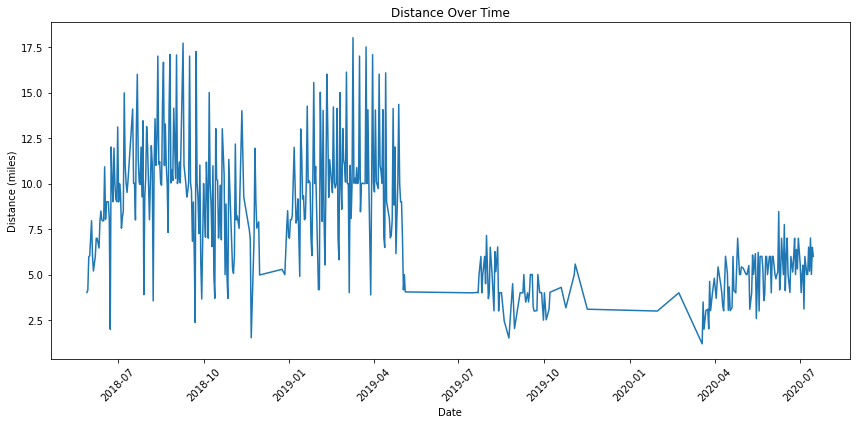

In [18]:
# distance over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=activity_by_date, x='Date', y='Distance')
plt.title('Distance Over Time')
plt.xlabel('Date')
plt.ylabel('Distance (miles)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

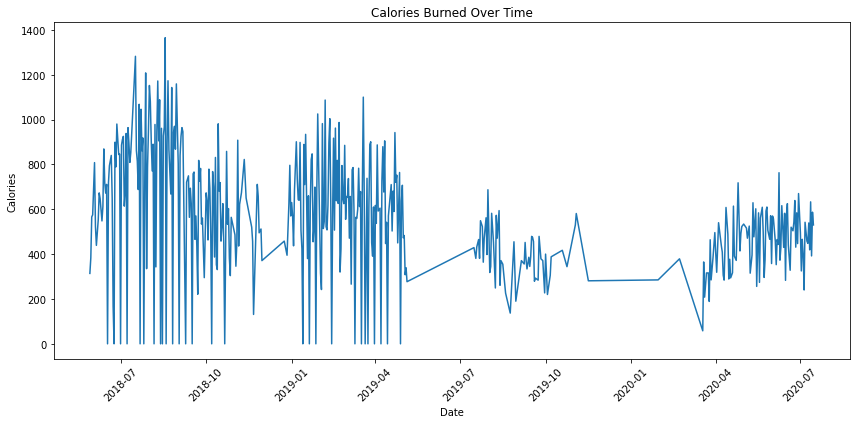

In [19]:
# calories over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=activity_by_date, x='Date', y='Calories')
plt.title('Calories Burned Over Time')
plt.xlabel('Date')
plt.ylabel('Calories')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

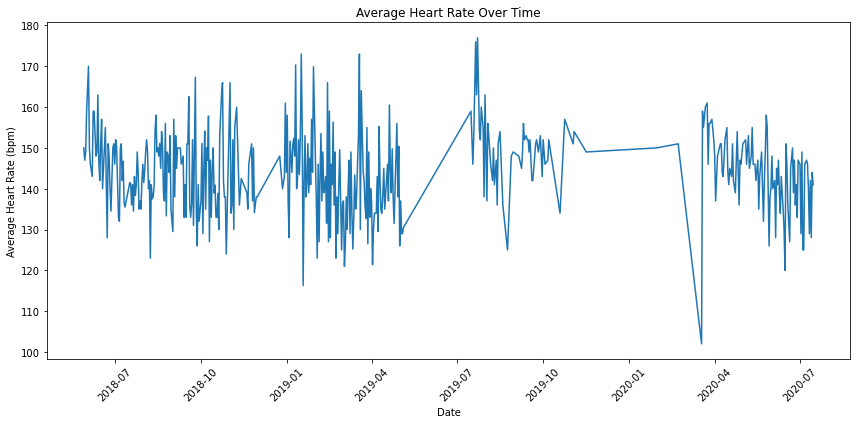

In [20]:
# average heart rate over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=activity_by_date, x='Date', y='Avg HR')
plt.title('Average Heart Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Average Heart Rate (bpm)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

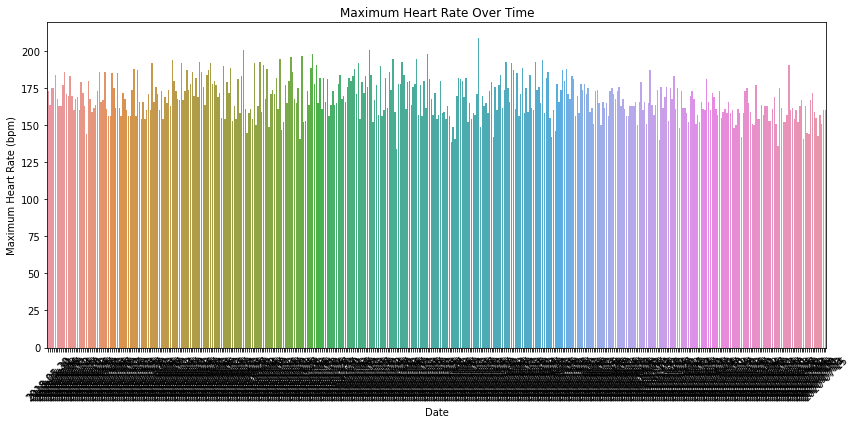

In [21]:
# maximum heart rate over time
plt.figure(figsize=(12, 6))
sns.barplot(data=activity_by_date, x='Date', y='Max HR')
plt.title('Maximum Heart Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Maximum Heart Rate (bpm)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

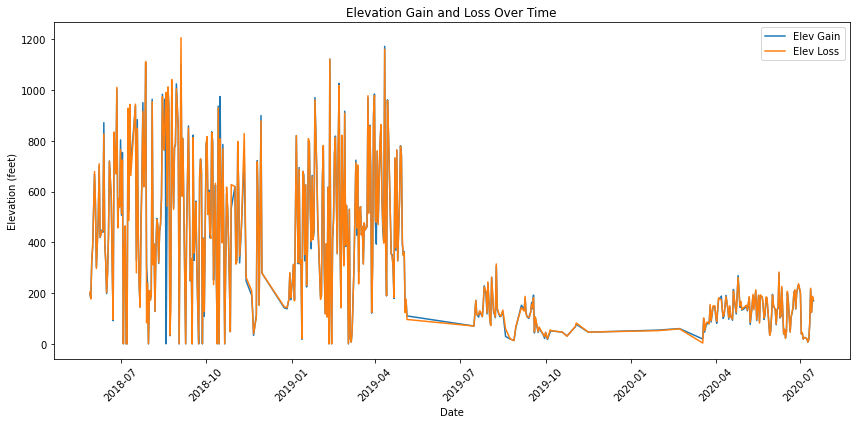

In [22]:
# elevation change over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=activity_by_date, x='Date', y='Elev Gain', label='Elev Gain')
sns.lineplot(data=activity_by_date, x='Date', y='Elev Loss', label='Elev Loss')
plt.title('Elevation Gain and Loss Over Time')
plt.xlabel('Date')
plt.ylabel('Elevation (feet)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()